<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 6:  Web Scraping
### Finding Underpriced RVs on Craigslist

![](https://snag.gy/WrdUMx.jpg)

In this project we will be practicing our web scraping skills.  You can use Scrapy or Python requests in order to complete this project.  It may be helpful to write some prototype code in this notebook to test your assumptions, then move it into a Python file that can be run from the command line.

> In order to run code from the command line, instead of the notebook, you just need to save your code to a file (with a .py extension), and run it using the Python interpreter:<br><br>
> `python my_file.py`

You will be building a process to scrape a single category of search results on Craigslist, that can easily be applied to other categories by changing the search terms.  The main goal is to be able to target and scrape a single page given a set of parameters.

**If you use Scrapy, provide your code in a folder.**

## Import your libraries for scrapy / requests / pandas / numpy / etc
Setup whichever libraries you need. Review past material for reference.

In [1]:
# PREPARE REQUIRED LIBRARIES
import requests
from lxml import html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1.  Scrape for the largest US cities (non-exhaustive list)
Search, research, and scrape Wikipedia for a list of the largest US cities.  There are a few sources but find one that is in a nice table.  We don't want all cities, just signifficant cities.  Examine your source.  Look for what can be differentiable.

- Use requests
- Build XPath query(ies)
- Extract to a list
- Clean your list

In [2]:
# SCRAPE WIKIPEDIA FOR LARGEST US CITIES (NON-EXHAUSTIVE LIST)
page = requests.get('https://simple.wikipedia.org/wiki/List_of_United_States_cities_by_population')
tree = html.fromstring(page.text) 

city = tree.xpath("//div/div/table/tr/td[2]/a/text()") #Xpath for the city
state = tree.xpath("//div/div/table/tr/td[3]/a/text()") #Xpath for the state

In [3]:
city #Top cities by population

['New York',
 'Los Angeles',
 'Chicago',
 'Houston',
 'Philadelphia',
 'Phoenix',
 'San Antonio',
 'San Diego',
 'Dallas',
 'San Jose',
 'Austin',
 'Jacksonville',
 'San Francisco',
 'Indianapolis',
 'Columbus',
 'Fort Worth',
 'Charlotte',
 'Detroit',
 'El Paso',
 'Seattle',
 'Denver',
 'Washington',
 'Memphis',
 'Boston',
 'Nashville',
 'Baltimore',
 'Oklahoma City',
 'Portland',
 'Las Vegas',
 'Louisville',
 'Milwaukee',
 'Albuquerque',
 'Tucson',
 'Fresno',
 'Sacramento',
 'Long Beach',
 'Kansas City',
 'Mesa',
 'Atlanta',
 'Virginia Beach',
 'Omaha',
 'Colorado Springs',
 'Raleigh',
 'Miami',
 'Oakland',
 'Minneapolis',
 'Tulsa',
 'Cleveland',
 'Wichita',
 'New Orleans',
 'Arlington',
 'Bakersfield',
 'Tampa',
 'Aurora',
 'Honolulu',
 'Anaheim',
 'Santa Ana',
 'Corpus Christi',
 'Riverside',
 'St. Louis',
 'Lexington',
 'Pittsburgh',
 'Stockton',
 'Anchorage',
 'Cincinnati',
 'Saint Paul',
 'Greensboro',
 'Toledo',
 'Newark',
 'Plano',
 'Henderson',
 'Lincoln',
 'Orlando',
 'Jerse

In [4]:
population_final = pd.DataFrame({'city' : city, 'state' : state}) #Dataframe of the city, and state

In [5]:
population_final.head()

,city,state
0,New York,New York
1,Los Angeles,California
2,Chicago,Illinois
3,Houston,Texas
4,Philadelphia,Pennsylvania


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1.2 Only retain cities with properly formed ASCII

Optionally, filter out any cities with impropper ASCII characters.  A smaller list will be easier to look at.  However you may not need to filter these if you spend more time scraping a more concise city list.  This list should help you narrow down the list of regional Craigslist sites.

In [6]:
# ONLY RETAIN PROPERLY FORMED CITIES WITH FILTERING FUNCTION
def isAscii(s):
    for c in s:
        if c not in 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ ': #Check if the character is Ascii
            return False
    return True

#Creating a list of only the ascii cities, and create a dataframe from those cities.
i = 0
listVal = []
stateVal = []
while i < len(population_final['city']):
    val = isAscii(population_final['city'][i])
    if val:
        listVal.append(population_final['city'][i]) #Append City to the list
        stateVal.append(population_final['state'][i]) #Append State to the list
    else:
        pass
    i += 1

In [7]:
population_final = pd.DataFrame({'city' : listVal,
 'state' : stateVal
  }) #Dataframe of the ascii city, and state.

In [8]:
len(population_final) #Compared to 297 from the original dataframe

293

In [9]:
population_final = population_final[0:20] #I am taking the 20 significant cities.

In [10]:
population_final

,city,state
0,New York,New York
1,Los Angeles,California
2,Chicago,Illinois
3,Houston,Texas
4,Philadelphia,Pennsylvania
5,Phoenix,Arizona
6,San Antonio,Texas
7,San Diego,California
8,Dallas,Texas
9,San Jose,California


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2.  Write a function to capture current pricing information via Craigslist in one city.
Choose a city from your scraped data, then go to the cooresponding city section on Craigslist, searching for "rv" in the auto section.  Write a method that pulls out the prices.

In [11]:
#Takes the city name (newyork) concats with the url and checks the xpath for the price.
def city_price(city):
    page = requests.get("https://"+city+".craigslist.org/search/sss?sort=rel&query=rv")
    tree = html.fromstring(page.text) 
    return tree.xpath("//div[@class = 'rows']/p[@class = 'row']/span[@class = 'txt']/span[@class = 'l2']/span[@class = 'price']/text()")

In [12]:
city_price("newyork")

['$37500',
 '$37500',
 '$3000',
 '$37500',
 '$37500',
 '$37500',
 '$5800',
 '$60',
 '$1700',
 '$95000',
 '$1050',
 '$85',
 '$15500',
 '$325',
 '$8900',
 '$20',
 '$20',
 '$20',
 '$14000',
 '$14000',
 '$325',
 '$55000',
 '$310',
 '$310',
 '$1095',
 '$1700',
 '$24306',
 '$5500',
 '$1',
 '$7500',
 '$2000',
 '$85',
 '$10000',
 '$500',
 '$20',
 '$4995',
 '$1',
 '$425',
 '$425',
 '$30350',
 '$360',
 '$1',
 '$10',
 '$425',
 '$425',
 '$135000',
 '$425',
 '$2300',
 '$1',
 '$1',
 '$1',
 '$2000',
 '$950',
 '$9995',
 '$8700',
 '$1999',
 '$100',
 '$30000',
 '$36900',
 '$15',
 '$5',
 '$2033',
 '$2030',
 '$2010',
 '$250',
 '$70',
 '$1000',
 '$1000',
 '$1000',
 '$40',
 '$100',
 '$100',
 '$100',
 '$32500',
 '$10700',
 '$6750',
 '$600',
 '$40',
 '$3000',
 '$8000',
 '$1000',
 '$400',
 '$18900',
 '$16900',
 '$2000',
 '$150',
 '$2005']

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2.1 Create a mapping of cities to cooresponding regional Craigslist URLs

Major US cities on Craigslist typically have their own cooresponding section (ie: SFBay Area, NYC, Boston, Miami, Seattle, etc).  Later, you will use these to query search results for various metropolitian regions listed on Craigslist.  Between the major metropolitan Craigslist sites, the only thing that will differ is the URL's that correspond to them.

The point of the "mapping":  Create a data structure that allows you to iterate with both the name of the city from Wikipedia, with the cooresponding variable that that will allow you to construct each craigslist URL for each region.

> For San Francsico (the Bay Area metropolitan area), the url for the RV search result is:
> http://sfbay.craigslist.org/search/sss?query=rv
>
> The convention is http://[region].craigslist.org/search/sss?query=rf
> Replacing [region] with the cooresponding city name will allow you to quickly iterate through each regional Craigslist site, and scrape the prices from the search results.  Keep this in mind while you build this "mapping".


In [13]:
#Lower case the cities.
population_final['mapVal'] = map(str.lower, population_final['city'].values)

In [14]:
population_final

,city,state,mapVal
0,New York,New York,new york
1,Los Angeles,California,los angeles
2,Chicago,Illinois,chicago
3,Houston,Texas,houston
4,Philadelphia,Pennsylvania,philadelphia
5,Phoenix,Arizona,phoenix
6,San Antonio,Texas,san antonio
7,San Diego,California,san diego
8,Dallas,Texas,dallas
9,San Jose,California,san jose


In [15]:
#Renaming and removing the cities that don't contain a craigslist page.
#remove sanjose, remove forthworth, washington to washingtondc, sf to sfbay

population_final['mapVal'][12] = 'sfbay'
population_final['mapVal'][21] = 'washingtondc'

In [16]:
population_final.drop([9, 15], inplace = True)

In [17]:
population_final.reset_index()

,index,city,state,mapVal
0,0,New York,New York,new york
1,1,Los Angeles,California,los angeles
2,2,Chicago,Illinois,chicago
3,3,Houston,Texas,houston
4,4,Philadelphia,Pennsylvania,philadelphia
5,5,Phoenix,Arizona,phoenix
6,6,San Antonio,Texas,san antonio
7,7,San Diego,California,san diego
8,8,Dallas,Texas,dallas
9,10,Austin,Texas,austin


In [18]:
population_final.head()

,city,state,mapVal
0,New York,New York,new york
1,Los Angeles,California,los angeles
2,Chicago,Illinois,chicago
3,Houston,Texas,houston
4,Philadelphia,Pennsylvania,philadelphia


In [19]:
#Remove the space from the city name to be used in the url.
listPop = []
for x in population_final['mapVal'].values:
    listPop.append(x.strip().replace(' ', ''))

In [20]:
#Set the list equal to a column which will be used for the url
population_final['mapVal'] = listPop

In [21]:
population_final.head()

,city,state,mapVal
0,New York,New York,newyork
1,Los Angeles,California,losangeles
2,Chicago,Illinois,chicago
3,Houston,Texas,houston
4,Philadelphia,Pennsylvania,philadelphia


In [22]:
#Function that sets the url for the cities.
def rv_region_url(region):
    for x in region:
        location = "http://"+ x + ".craigslist.org/search/sss?query=rv"
        print location

In [23]:
rv_region_url(population_final['mapVal'])

http://newyork.craigslist.org/search/sss?query=rv
http://losangeles.craigslist.org/search/sss?query=rv
http://chicago.craigslist.org/search/sss?query=rv
http://houston.craigslist.org/search/sss?query=rv
http://philadelphia.craigslist.org/search/sss?query=rv
http://phoenix.craigslist.org/search/sss?query=rv
http://sanantonio.craigslist.org/search/sss?query=rv
http://sandiego.craigslist.org/search/sss?query=rv
http://dallas.craigslist.org/search/sss?query=rv
http://austin.craigslist.org/search/sss?query=rv
http://jacksonville.craigslist.org/search/sss?query=rv
http://sfbay.craigslist.org/search/sss?query=rv
http://indianapolis.craigslist.org/search/sss?query=rv
http://columbus.craigslist.org/search/sss?query=rv
http://charlotte.craigslist.org/search/sss?query=rv
http://detroit.craigslist.org/search/sss?query=rv
http://elpaso.craigslist.org/search/sss?query=rv
http://seattle.craigslist.org/search/sss?query=rv


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Define a function to caculate mean and median price per city.

Now that you've created a list of cities you want to scrape, adapt your solution for grabbing data in one region site, to grab data for all regional sites that you collected, then calculate the mean and median price of RV results from each city.

> Look at the URLs from a few different regions (ie: portland, phoenix, sfbay), and find what they have in common.  Determine the area in the URL string that needs to change the least, and figure out how to replace only that portion of the URL in order to iterate through each city.

In [24]:
#Function that sets the median and mean of all the cities in the list.
def rv_region_val(region):
    sumVal = []
    for x in region:
        try:
            location = "http://"+ x + ".craigslist.org/search/sss?query=rv"
            page = requests.get(location)
            tree = html.fromstring(page.text) 
            print x
            val = tree.xpath("//div[@class = 'rows']/p[@class = 'row']/span[@class = 'txt']/span[@class = 'l2']/span[@class = 'price']/text()")
            for v in val:
                clean = v.replace("$", "")
                intVal = int(clean)
                if np.abs(intVal-np.mean(intVal))<=(3*np.std(intVal)): #Remove outliers
                    sumVal.append(intVal)
            print "Mean", np.mean(sumVal)
            print "Median", np.median(sumVal)
            print ""
        except:
            pass
        del sumVal[:] #Reset the list.

In [25]:
rv_region_val(population_final['mapVal'])

newyork
Mean 9587.57471264
Median 1050.0

losangeles
Mean 25084.5076923
Median 16000.0

chicago
Mean 6064.26470588
Median 187.5

houston
Mean 21121.75
Median 14944.0

philadelphia
Mean 21229.9775281
Median 3500.0

phoenix
Mean 28870.2234043
Median 26230.0

sanantonio
Mean 41771.8333333
Median 21900.0

sandiego
Mean 23755.835443
Median 950.0

dallas
Mean 24121.0
Median 19995.0

austin
Mean 33267.5384615
Median 23967.0

jacksonville
Mean 13693.9438202
Median 449.0

sfbay
Mean 27928.1794872
Median 18999.0

indianapolis
Mean 7036.75
Median 2000.0

columbus
Mean 8938.91489362
Median 762.5

charlotte
Mean 9190.51162791
Median 555.0

detroit
Mean 22423.7311828
Median 19999.0

elpaso
Mean 43304.1182796
Median 16999.0

seattle
Mean 32008.8947368
Median 26999.0



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Run your scraping process, and save your results to a CSV file.

In [26]:
#Similar to #3 except I set the median and mean value to a new dataframe column.
def rv_region_med(region):
    sumVal = []
    medList = []
    meanList = []
    for x in region:
        try:
            location = "http://"+ x + ".craigslist.org/search/sss?query=rv"
            page = requests.get(location)
            tree = html.fromstring(page.text) 
            print x
            print ""
            val = tree.xpath("//div[@class = 'rows']/p[@class = 'row']/span[@class = 'txt']/span[@class = 'l2']/span[@class = 'price']/text()")
            for v in val:
                clean = v.replace("$", "")
                intVal = int(clean)
                if np.abs(intVal-np.mean(intVal))<=(3*np.std(intVal)):
                    sumVal.append(intVal)
            meanVal = np.mean(sumVal)
            medVal = np.median(sumVal)
            medList.append(medVal)
            meanList.append(meanVal)
            print "Mean", meanVal
            print "Median", medVal
            print "-----" 
        except: #If there is no url set the mean and median to 0.
            meanList.append(0)
            medList.append(0)
        del sumVal[:]
    population_final['median'] = medList
    population_final['mean'] = meanList

In [27]:
rv_region_med(population_final['mapVal'])

newyork

Mean 9587.57471264
Median 1050.0
-----
losangeles

Mean 25084.5076923
Median 16000.0
-----
chicago

Mean 6064.26470588
Median 187.5
-----
houston

Mean 21121.75
Median 14944.0
-----
philadelphia

Mean 21229.9775281
Median 3500.0
-----
phoenix

Mean 28870.2234043
Median 26230.0
-----
sanantonio

Mean 41771.8333333
Median 21900.0
-----
sandiego

Mean 23755.835443
Median 950.0
-----
dallas

Mean 24121.0
Median 19995.0
-----
austin

Mean 33267.5384615
Median 23967.0
-----
jacksonville

Mean 13693.9438202
Median 449.0
-----
sfbay

Mean 27928.1794872
Median 18999.0
-----
indianapolis

Mean 7036.75
Median 2000.0
-----
columbus

Mean 8938.91489362
Median 762.5
-----
charlotte

Mean 9190.51162791
Median 555.0
-----
detroit

Mean 22423.7311828
Median 19999.0
-----
elpaso

Mean 43304.1182796
Median 16999.0
-----
seattle

Mean 32008.8947368
Median 26999.0
-----


In [28]:
population_final

,city,state,mapVal,median,mean
0,New York,New York,newyork,1050.0,9587.574713
1,Los Angeles,California,losangeles,16000.0,25084.507692
2,Chicago,Illinois,chicago,187.5,6064.264706
3,Houston,Texas,houston,14944.0,21121.750000
4,Philadelphia,Pennsylvania,philadelphia,3500.0,21229.977528
5,Phoenix,Arizona,phoenix,26230.0,28870.223404
6,San Antonio,Texas,sanantonio,21900.0,41771.833333
7,San Diego,California,sandiego,950.0,23755.835443
8,Dallas,Texas,dallas,19995.0,24121.000000
10,Austin,Texas,austin,23967.0,33267.538462


In [29]:
population_final.to_csv('rv_prices.csv', index = False) #Write to csv file, I'm removing the index column

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Do an analysis of the RV market.

Go head we'll wait.  Anything notable about the data?

In [30]:
population_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 19
Data columns (total 5 columns):
city      18 non-null object
state     18 non-null object
mapVal    18 non-null object
median    18 non-null float64
mean      18 non-null float64
dtypes: float64(2), object(3)
memory usage: 864.0+ bytes


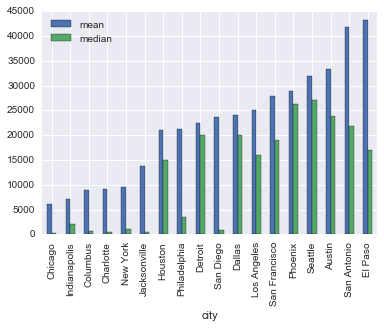

In [31]:
population_final.groupby('city')[['mean', 'median']].mean().sort_values(by = 'mean', ascending = True).plot(kind = 'bar')

In [ ]:
#El Paso, Texas has the highest mean value for RVs while Chicago has the least. 
#Therefore we can conclude it might be useful to buy an RV from Chicago and sell it at ElPaso.

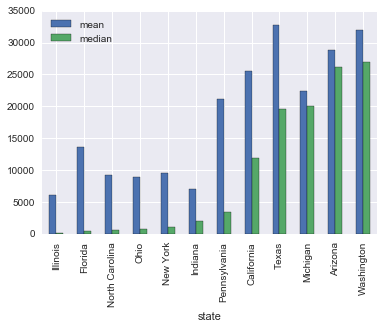

In [52]:
population_final.groupby('state')[['mean', 'median']].mean().sort_values(by = 'median', ascending = True).plot(kind = 'bar')

In [ ]:
#Looking at the median, Seattle has the highest median; however its mean is higher so we could say that data
#is positively skewed for seattle. Chicago has the lowest median. 

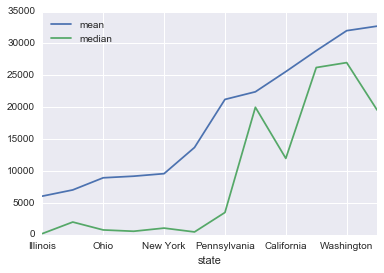

In [54]:
population_final.groupby('state')[['mean', 'median']].mean().sort_values(by = 'mean', ascending = True).plot(kind = 'line')

In [ ]:
#Based on this line graph we can see that the mean slowly increases based on the states from Illnois to Washington.
#The median however is unstable but increases from Illnois to Washinton.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Does it makes sense to buy RVs in one region and sell them in another?

Assuming the cost of shipping or driving from one regional market to another.

In [34]:
city = population_final['city']

In [35]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
listLat = []
listLong = []
for x in city:
    location = geolocator.geocode(x)
    listLat.append(location.latitude)
    listLong.append(location.longitude)
population_final['lat'] = listLat
population_final['long'] = listLong

In [36]:
population_lat = population_final.sort_values(by = ['mean', 'lat', 'long'], ascending = True)

In [37]:
population_lat = population_lat.reset_index()

In [38]:
population_lat.drop('index', axis = 1, inplace = True)

In [39]:
population_lat.groupby('state')['city'].count().sort_values(ascending = True)

state
Arizona           1
Florida           1
Illinois          1
Indiana           1
Michigan          1
New York          1
North Carolina    1
Ohio              1
Pennsylvania      1
Washington        1
California        3
Texas             5
Name: city, dtype: int64

In [40]:
population_lat[population_lat['state'] == 'California']
#Best to buy at SanDiego and sell at SF. 

,city,state,mapVal,median,mean,lat,long
9,San Diego,California,sandiego,950.0,23755.835443,32.717421,-117.162771
11,Los Angeles,California,losangeles,16000.0,25084.507692,34.054394,-118.243941
12,San Francisco,California,sfbay,18999.0,27928.179487,37.779281,-122.419236


In [41]:
population_lat[population_lat['state'] == 'Texas']
#Lookin at the information for Texas we can see there are some cities that would be worth buying and 
#later selling to. We could buy from Dallas, Texas and sell the RV at San Antonio.

,city,state,mapVal,median,mean,lat,long
6,Houston,Texas,houston,14944.0,21121.750000,29.758938,-95.367697
10,Dallas,Texas,dallas,19995.0,24121.000000,32.776272,-96.796856
15,Austin,Texas,austin,23967.0,33267.538462,30.271129,-97.743699
16,San Antonio,Texas,sanantonio,21900.0,41771.833333,29.424600,-98.495140
17,El Paso,Texas,elpaso,16999.0,43304.118280,31.760037,-106.487287


In [42]:
population_lat[(population_lat['state'] == 'Pennsylvania') | (population_lat['state'] == 'New York')]
#We could buy an RV from NY and sell it to Philadelphia.

,city,state,mapVal,median,mean,lat,long
4,New York,New York,newyork,1050.0,9587.574713,40.730599,-73.986581
7,Philadelphia,Pennsylvania,philadelphia,3500.0,21229.977528,39.952399,-75.163590


In [43]:
population_lat[(population_lat['state'] == 'Michigan') | (population_lat['state'] == 'Indiana')]
#Buy a RV at Indianapolis and sell at Detroit

,city,state,mapVal,median,mean,lat,long
1,Indianapolis,Indiana,indianapolis,2000.0,7036.750000,39.768333,-86.158350
8,Detroit,Michigan,detroit,19999.0,22423.731183,42.348664,-83.056737


There are some situations in which it would be better to buy from one region and sell in another.
A person can buy an RV from San Diego and sell it at SF for a profit. Similar situations include:
buying at Dallas and selling at San Antonio, NY selling at Philadelphia and Indianapolis and 
selling at Detroit.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.2 Can you pull out the "make" from the markup and include that in your analyis?
How reliable is this data and does it make sense?

In [44]:
#For now I'm inserting the first make into a list.
def rv_make(region):
    makeList = []
    for x in region:
        try:
            location = "http://"+ x + ".craigslist.org/search/sss?query=rv"
            page = requests.get(location)
            tree = html.fromstring(page.text) 
            print x
            print ""
            val = tree.xpath("//div[@class='rows']/p[@class='row'][1]/span[@class='txt']/span[@class='pl']/a/text()")
            for v in val:
                makeList.append(v)
            print "-----"
        except:
            print "NA"
            print "-----"
    population_final['make'] = makeList

In [45]:
rv_make(population_final['mapVal'])

newyork

-----
losangeles

-----
chicago

-----
houston

-----
philadelphia

-----
phoenix

-----
sanantonio

-----
sandiego

-----
dallas

-----
austin

-----
jacksonville

-----
sfbay

-----
indianapolis

-----
columbus

-----
charlotte

-----
detroit

-----
elpaso

-----
seattle

-----


In [46]:
population_final['make']

0                              2003 National RV Dolphin
1     2017 Forest River RV Surveyor 245BHS Travel Tr...
2                                              RV STOVE
3     2017 Open Range RV Mesa Ridge Fifth Wheel MF34...
4     2011 Heartland RV North Country 291RLS Travel ...
5     FREE DELIVERY ...RV Mattress (Luxury Memory Foam)
6     2017 Open Range RV Mesa Ridge Travel Trailer M...
7                              Boss Digital Reverb RV-5
8     *2016* *KEYSTONE RV COMPANY* *3721rl* ** (PG21...
10    2016 Open Range RV The Light Travel Trailer LT...
11         2000 National RV Tradewinds 7370 Class A RVs
12    *2017* *Forest River RV* *Rockwood Hard Side H...
13                       1999 National RV 2030SB (3553)
14                  2014 KZ RV Inferno 4005T Toy Hauler
16                        1992 Rockwood 32 ft diesel rv
17    *2017* *Coachmen RV* *Apex Ultra-lite 259bhss ...
18                     2012 *GMC* *Savana* RV G2500 3LT
19    *2014* *Keystone RV* *331-rlt 331rlt* ** (

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.3 Are there any other variables you could pull out of the markup to help describe your dataset?

In [47]:
#For now I'm inserting the first image into a list.
def rv_img(region):
    makeList = []
    for x in region:
        try:
            location = "http://"+ x + ".craigslist.org/search/sss?query=rv"
            page = requests.get(location)
            tree = html.fromstring(page.text) 
            print x
            print ""
            val = tree.xpath("//div[@class='rows']/p[@class='row'][1]/a/@href")
            for v in val:
                makeList.append(v)
            print "-----"
        except:
            print "NA"
            print "-----"
    population_final['img'] = makeList

In [48]:
rv_img(population_final['mapVal'])

newyork

-----
losangeles

-----
chicago

-----
houston

-----
philadelphia

-----
phoenix

-----
sanantonio

-----
sandiego

-----
dallas

-----
austin

-----
jacksonville

-----
sfbay

-----
indianapolis

-----
columbus

-----
charlotte

-----
detroit

-----
elpaso

-----
seattle

-----


In [49]:
population_final

,city,state,mapVal,median,mean,lat,long,make,img
0,New York,New York,newyork,1050.0,9587.574713,40.730599,-73.986581,2003 National RV Dolphin,/wch/rvs/5759337354.html
1,Los Angeles,California,losangeles,16000.0,25084.507692,34.054394,-118.243941,2017 Forest River RV Surveyor 245BHS Travel Tr...,/lac/rvd/5761912381.html
2,Chicago,Illinois,chicago,187.5,6064.264706,41.875555,-87.624421,RV STOVE,/chc/rvs/5759353827.html
3,Houston,Texas,houston,14944.0,21121.750000,29.758938,-95.367697,2017 Open Range RV Mesa Ridge Fifth Wheel MF34...,/rvd/5762039639.html
4,Philadelphia,Pennsylvania,philadelphia,3500.0,21229.977528,39.952399,-75.163590,2011 Heartland RV North Country 291RLS Travel ...,/rvd/5722187042.html
5,Phoenix,Arizona,phoenix,26230.0,28870.223404,33.448587,-112.077346,FREE DELIVERY ...RV Mattress (Luxury Memory Foam),/wvl/fud/5724230828.html
6,San Antonio,Texas,sanantonio,21900.0,41771.833333,29.424600,-98.495140,2017 Open Range RV Mesa Ridge Travel Trailer M...,/rvd/5761705162.html
7,San Diego,California,sandiego,950.0,23755.835443,32.717421,-117.162771,Boss Digital Reverb RV-5,/nsd/msg/5753831309.html
8,Dallas,Texas,dallas,19995.0,24121.000000,32.776272,-96.796856,*2016* *KEYSTONE RV COMPANY* *3721rl* ** (PG21...,/dal/rvd/5762093185.html
10,Austin,Texas,austin,23967.0,33267.538462,30.271129,-97.743699,2016 Open Range RV The Light Travel Trailer LT...,/rvd/5762000771.html


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Move your project into scrapy (if you haven't used Scrapy yet)

>Start a project by using the command `scrapy startproject [projectname]`
> - Update your settings.py (review our past example)
> - Update your items.py
> - Create a spiders file in your `[project_name]/[project_name]/spiders` directory

You can update your spider class with the complete list of craigslist "start urls" to effectively scrape all of the regions.  Start with one to test.

Updating your parse method with the method you chose should require minimal changes.  It will require you to update your parse method to use the response parameter, and an item model (defined in items.py).

In [50]:
#Files are submitted in the github folder: craigslist
#www.github.com/nsivapra/DSI-SF-2-nsivapra/craigslist

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7.  Chose another area of Craigslist to scrape.

**Choose an area having more than a single page of results, then scrape multiple regions, multiple pages of search results and or details pages.**

This is the true exercise of being able to understand how to succesffuly plan, develop, and employ a broader scraping strategy.  Even though this seems like a challenging task, a few tweeks of your current code can make this very managable if you've pieced together all the touch points.  If you are still confused as to some of the milestones within this process, this is an excellent opportunity to round out your understanding, or help you build a list of questions to fill in your gaps.

_Use Scrapy!  Provide your code in this project directory when you submit this project._